In [1]:
import pandas as pd

file_path = '/Users/MAzarderakhsh/Dropbox (City Tech)/lakes-scale/Fahmeda/ML/Landsat/adk_lakes/lagoes_adk_modified.csv'
df_merge = pd.read_csv(file_path)
df_merge
df_merge.dropna(subset=['Permanent_'])
df_merge.dropna(subset=['nhd_long'], inplace=True)
df_merge = df_merge.rename(columns={'sampledate': 'DATE'})
df_merge = df_merge.rename(columns={'colort': 'TRUCOLOR'})
df_merge = df_merge.rename(columns={'maxdepth': 'MEANDEPTH'})
df_merge = df_merge.rename(columns={'nhd_long': 'Lon'})
df_merge = df_merge.rename(columns={'nhd_lat': 'Lat'})


df_merge

,Unnamed: 0,lagoslakeid,DATE,programname,chla,TRUCOLOR,doc,secchi,Permanent_,Lat,Lon,lagosname1,meandepth,meandepthsource,MEANDEPTH,maxdepthsource
0,1,126841,11/5/85,NY_LCI_CHEM,8.4,10.0,5.700,1.00,47725041,43.294298,-74.429060,NaN,NaN,NaN,9.5,NaN
1,2,126841,6/4/85,NY_LCI_CHEM,13.9,13.0,5.000,2.00,47725041,43.294298,-74.429060,NaN,NaN,NaN,9.5,NaN
2,3,126841,9/15/87,NY_LCI_CHEM,5.8,12.0,4.300,1.33,47725041,43.294298,-74.429060,NaN,NaN,NaN,9.5,NaN
3,4,100953,10/7/86,NY_LCI_CHEM,0.8,2.0,2.200,7.80,131844984,43.712164,-74.798791,LIMEKILN LAK,6.1,NaN,21.9,NaN
4,5,117429,10/6/86,NY_LCI_CHEM,3.6,50.0,6.300,2.20,131846419,43.591768,-75.118169,OTTER LAKE,NaN,NaN,2.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16857,17674,134885,8/2/94,NY_ADIRONDACK,NaN,35.0,6.179,NaN,135270711,44.660228,-74.496335,LITTLE CLEAR POND,5.5,NaN,14.0,NaN
16858,17675,138250,9/9/93,NY_ADIRONDACK,NaN,5.0,1.383,NaN,53542015,43.188251,-74.499163,OTTER LAKE,2.3,NaN,4.0,NaN
16859,17676,139249,11/10/92,NY_ADIRONDACK,NaN,30.0,5.554,NaN,47723283,43.369060,-74.241587,WILLIS LAKE,1.6,NaN,2.7,NaN
16860,17677,139249,9/9/93,NY_ADIRONDACK,NaN,80.0,12.591,NaN,47723283,43.369060,-74.241587,WILLIS LAKE,1.6,NaN,2.7,NaN


In [2]:
# Get unique values in the 'PONDNAME' column
unique_pondnames = df_merge['lagosname1'].unique()

# Display the unique pond names
print(len(unique_pondnames))

887


In [3]:
# Convert the 'DATE' column to datetime format with the specified year format

df_merge['DATE'] = pd.to_datetime(df_merge['DATE'], format='%m/%d/%y', errors='coerce')
df_merge['DATE'] = df_merge['DATE'].dt.strftime('%m/%d/%Y')
df_merge = df_merge[df_merge['TRUCOLOR'] >1 ]

df_merge


,Unnamed: 0,lagoslakeid,DATE,programname,chla,TRUCOLOR,doc,secchi,Permanent_,Lat,Lon,lagosname1,meandepth,meandepthsource,MEANDEPTH,maxdepthsource
0,1,126841,11/05/1985,NY_LCI_CHEM,8.4,10.0,5.700,1.00,47725041,43.294298,-74.429060,NaN,NaN,NaN,9.5,NaN
1,2,126841,06/04/1985,NY_LCI_CHEM,13.9,13.0,5.000,2.00,47725041,43.294298,-74.429060,NaN,NaN,NaN,9.5,NaN
2,3,126841,09/15/1987,NY_LCI_CHEM,5.8,12.0,4.300,1.33,47725041,43.294298,-74.429060,NaN,NaN,NaN,9.5,NaN
3,4,100953,10/07/1986,NY_LCI_CHEM,0.8,2.0,2.200,7.80,131844984,43.712164,-74.798791,LIMEKILN LAK,6.1,NaN,21.9,NaN
4,5,117429,10/06/1986,NY_LCI_CHEM,3.6,50.0,6.300,2.20,131846419,43.591768,-75.118169,OTTER LAKE,NaN,NaN,2.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16857,17674,134885,08/02/1994,NY_ADIRONDACK,NaN,35.0,6.179,NaN,135270711,44.660228,-74.496335,LITTLE CLEAR POND,5.5,NaN,14.0,NaN
16858,17675,138250,09/09/1993,NY_ADIRONDACK,NaN,5.0,1.383,NaN,53542015,43.188251,-74.499163,OTTER LAKE,2.3,NaN,4.0,NaN
16859,17676,139249,11/10/1992,NY_ADIRONDACK,NaN,30.0,5.554,NaN,47723283,43.369060,-74.241587,WILLIS LAKE,1.6,NaN,2.7,NaN
16860,17677,139249,09/09/1993,NY_ADIRONDACK,NaN,80.0,12.591,NaN,47723283,43.369060,-74.241587,WILLIS LAKE,1.6,NaN,2.7,NaN


In [4]:
import geemap
import ee
Map= geemap.Map()
lake_point = ee.Geometry.Point(-73.817681, 44.568648).buffer(100)

Map.addLayer(lake_point)
Map.centerObject(lake_point, 16)
Map

Map(center=[44.5686481025329, -73.8176809959741], controls=(WidgetControl(options=['position', 'transparent_bg…

In [5]:
import ee
import geemap
import pandas as pd

# Initialize Earth Engine
ee.Initialize()

# Define the Landsat 5 bands and their corresponding standard names
LC5_BANDS = ['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B7', 'ST_B6', 'QA_PIXEL']
STD_NAMES = ['blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'temp', 'QA']

# Convert the 'DATE' column to datetime format
df_merge['DATE'] = pd.to_datetime(df_merge['DATE'])

# Define a function to mask clouds and cloud shadows from Landsat 5 surface reflectance imagery
def maskL457sr(image):
    qaMask = image.select('QA_PIXEL').bitwiseAnd(int('11111', 2)).eq(0)
    saturationMask = image.select('QA_RADSAT').eq(0)
    waterMask = image.select('QA_PIXEL').eq(5440).Or(image.select('QA_PIXEL').eq(5504))
    opticalBands = image.select('SR_B.').multiply(0.0000275).add(-0.2)
    thermalBand = image.select('ST_B6').multiply(0.00341802).add(-124.15)
    return image.addBands(opticalBands, None, True).addBands(thermalBand, None, True).updateMask(qaMask).updateMask(saturationMask).updateMask(waterMask)

# Define a custom filtering function
def filter_function(image):
    # Calculate the percentage of unmasked pixels in the ROI for MNDWI
    unmasked_percentage = image.unmask(0) \
        .reduceRegion(
            reducer=ee.Reducer.mean(),
            geometry=lake_point,
            scale=30
        ).get('blue')

    # Calculate the percentage of masked pixels
    masked_percentage = ee.Number(1).subtract(unmasked_percentage)

    # Flag images where more than 50% of the ROI is masked
    is_masked = masked_percentage.lt(0.5)

    # Add a new band indicating whether the image is masked or not
    return image.addBands(ee.Image([is_masked]).rename(['isMasked'])).addBands('blue')



 


# Define a function to compute the mean reflectance values for the specified bands within the region of interest (lake)
def reflectance(img, lake_point):
    # Combine reducers with shared inputs
    reducers = ee.Reducer.mean().combine(reducer2=ee.Reducer.stdDev(), sharedInputs=True)
    # Use the combined reducer to get the mean and SD of the image.
    reflectance_values = img.reduceRegion(reducer=reducers, bestEffort=True)
    # Set properties on the image
    return img.set('DATE_SMP', img.date().format()).set('reflectance', reflectance_values)

# Initialize an empty list to store the filtered DataFrames for each lake
filtered_dfs = []

# Loop through each lake in the DataFrame
for index, row in df_merge.iterrows():
    # Extract the current lake's information
    #pondname = row['PONDNAME']
    pondno = row['Permanent_']
    date = row['DATE']
   # doc = row['DOC']
    trucolor = row['TRUCOLOR']
    depth = row['MEANDEPTH']
    #area = row['SAREA']


    
    # Create a 2-day window around the current date
    date_window_start = date - pd.Timedelta(days=2)
    date_window_end = date + pd.Timedelta(days=2)

    # Filter the DataFrame based on the current lake's 2-day window
    #filtered_df = df_merge[(df_merge['PONDNAME'] == pondname) & (df_merge['DATE'] >= date_window_start) & (df_merge['DATE'] <= date_window_end)]
    filtered_df = df_merge
    # Create a geometry point for the lake
    #lake_point = ee.Geometry.Point(row['LONG_NAD83DD'], row['LAT_NAD83DD']).buffer(100)
    lake_point = ee.Geometry.Point(row['Lon'], row['Lat']).buffer(100)

    # Retrieve Landsat 5 imagery for the specific lake
    l5 = ee.ImageCollection('LANDSAT/LT05/C02/T1_L2') \
        .filterBounds(lake_point) \
        .filter(ee.Filter.lt('CLOUD_COVER', 45)) \
        .filterDate(date_window_start, date_window_end) \
        .map(maskL457sr) \
        .select(LC5_BANDS, STD_NAMES) 
    # \
    #     .map(filter_function) 

        #    .filter(ee.Filter.calendarRange(5, 12, 'month')) \
        # .filter(ee.Filter.calendarRange(1984, 1987, 'year')) \
    # Map the reflectance function over the Landsat 5 ImageCollection for the specific lake
    map_reflectance = l5.map(lambda img: reflectance(img, lake_point))

    # Reduce the mapped image collection to get reflectance values for the specific lake
    list_reflectance = map_reflectance.reduceColumns(ee.Reducer.toList(2), ['DATE_SMP', 'reflectance']).values().get(0)

    # Convert the results to a pandas DataFrame
    df_reflectance = pd.DataFrame(list_reflectance.getInfo(), columns=['DATE_SMP', 'reflectance'])
    df_reflectance['DATE_SMP'] = pd.to_datetime(df_reflectance['DATE_SMP'])
    df_reflectance['DATE_SMP'] = df_reflectance['DATE_SMP'].dt.date
    df_reflectance['reflectance'] = df_reflectance['reflectance'].apply(lambda x: {k: v for k, v in x.items() if v is not None})

    # Unpack the 'reflectance' dictionary and create separate columns for each band
    df_reflectance = pd.concat([df_reflectance.drop('reflectance', axis=1),
                                df_reflectance['reflectance'].apply(pd.Series).astype('float64', errors='ignore')], axis=1)

    # Add a new column for the lake name
    df_reflectance['PONDNAME'] = pondno
      #df_reflectance['DOC'] = doc
    df_reflectance['TRUCOLOR'] = trucolor
    df_reflectance['MEANDEPTH'] = depth
   # df_reflectance['SAREA'] = area
    df_reflectance['DATE'] =date


    # Add the DataFrame to the list
    filtered_dfs.append(df_reflectance)

# Concatenate all filtered DataFrames into a single DataFrame
df_filtered_lakes = pd.concat(filtered_dfs, ignore_index=True)

# Sort the DataFrame by 'DATE' in ascending order
df_filtered_lakes.sort_values(by='DATE_SMP', inplace=True)

# remove data based on Temp < 10 
df_filtered_lakes = df_filtered_lakes[df_filtered_lakes['temp_mean'] >= 5]

print(df_filtered_lakes)


        DATE_SMP  reflectance   PONDNAME  TRUCOLOR  MEANDEPTH       DATE  \
2924  1984-08-20          NaN  131845552      35.0        7.6 1984-08-21   
3209  1984-08-20          NaN  131845828       5.0       23.2 1984-08-20   
3239  1984-08-20          NaN  131845584      25.0        7.0 1984-08-20   
2978  1984-08-20          NaN  131842282      15.0        NaN 1984-08-22   
2823  1984-08-20          NaN  131845673      35.0        3.0 1984-08-22   
...          ...          ...        ...       ...        ...        ...   
763   2011-10-09          NaN  131845836      70.0       10.7 2011-10-11   
321   2011-10-09          NaN  115353775      12.0       50.0 2011-10-10   
281   2011-10-09          NaN   53542009      32.0       14.3 2011-10-09   
648   2011-10-09          NaN  131844719      30.0       10.1 2011-10-11   
702   2011-10-09          NaN  131845641      20.0        6.7 2011-10-11   

          QA_mean  QA_stdDev  blue_mean  blue_stdDev  ...  nir_mean  \
2924  5441.58806

In [6]:
df_filtered_lakes.drop('reflectance', axis=1)
#df_filtered_lakes.to_csv('l5-sr-adk-hist.csv', index=False)


,DATE_SMP,PONDNAME,TRUCOLOR,MEANDEPTH,DATE,QA_mean,QA_stdDev,blue_mean,blue_stdDev,green_mean,...,nir_mean,nir_stdDev,red_mean,red_stdDev,swir1_mean,swir1_stdDev,swir2_mean,swir2_stdDev,temp_mean,temp_stdDev
2924,1984-08-20,131845552,35.0,7.6,1984-08-21,5441.588065,9.954285,0.035858,0.015617,0.059482,...,0.361497,0.093983,0.046264,0.019434,0.175126,0.052561,0.075018,0.028270,17.591752,2.745694
3209,1984-08-20,131845828,5.0,23.2,1984-08-20,5441.588065,9.954285,0.035858,0.015617,0.059482,...,0.361497,0.093983,0.046264,0.019434,0.175126,0.052561,0.075018,0.028270,17.591752,2.745694
3239,1984-08-20,131845584,25.0,7.0,1984-08-20,5441.588065,9.954285,0.035858,0.015617,0.059482,...,0.361497,0.093983,0.046264,0.019434,0.175126,0.052561,0.075018,0.028270,17.591752,2.745694
2978,1984-08-20,131842282,15.0,NaN,1984-08-22,5441.588065,9.954285,0.035858,0.015617,0.059482,...,0.361497,0.093983,0.046264,0.019434,0.175126,0.052561,0.075018,0.028270,17.591752,2.745694
2823,1984-08-20,131845673,35.0,3.0,1984-08-22,5441.588065,9.954285,0.035858,0.015617,0.059482,...,0.361497,0.093983,0.046264,0.019434,0.175126,0.052561,0.075018,0.028270,17.591752,2.745694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,2011-10-09,131845836,70.0,10.7,2011-10-11,5444.435964,16.253445,0.033591,0.011020,0.053133,...,0.221307,0.080241,0.051290,0.017517,0.156651,0.055403,0.076656,0.032004,21.758904,2.280678
321,2011-10-09,115353775,12.0,50.0,2011-10-10,5443.360008,14.276402,0.036387,0.013545,0.057491,...,0.211195,0.071267,0.057365,0.020593,0.160308,0.057349,0.082702,0.037994,21.993284,2.189887
281,2011-10-09,53542009,32.0,14.3,2011-10-09,5444.435964,16.253445,0.033591,0.011020,0.053133,...,0.221307,0.080241,0.051290,0.017517,0.156651,0.055403,0.076656,0.032004,21.758904,2.280678
648,2011-10-09,131844719,30.0,10.1,2011-10-11,5444.435964,16.253445,0.033591,0.011020,0.053133,...,0.221307,0.080241,0.051290,0.017517,0.156651,0.055403,0.076656,0.032004,21.758904,2.280678


In [9]:
unique_pondnames = df_filtered_lakes['PONDNAME'].unique()

# Display the unique pond names
print(len(unique_pondnames))

449


In [28]:
df_filtered_lakes['estimate'] = df_filtered_lakes['nir_mean'].divide(df_filtered_lakes['green_mean'])


In [29]:
df_filtered_lakes.drop('reflectance', axis=1)
df_filtered_lakes = df_filtered_lakes.dropna(subset=['MEANDEPTH'])
df_filtered_lakes

,DATE_SMP,reflectance,PONDNAME,TRUCOLOR,MEANDEPTH,DATE,QA_mean,QA_stdDev,blue_mean,blue_stdDev,...,nir_stdDev,red_mean,red_stdDev,swir1_mean,swir1_stdDev,swir2_mean,swir2_stdDev,temp_mean,temp_stdDev,estimate
2924,1984-08-20,NaN,131845552,35.0,7.6,1984-08-21,5441.588065,9.954285,0.035858,0.015617,...,0.093983,0.046264,0.019434,0.175126,0.052561,0.075018,0.028270,17.591752,2.745694,6.077437
3159,1984-08-20,NaN,92083515,25.0,12.0,1984-08-20,5441.588065,9.954285,0.035858,0.015617,...,0.093983,0.046264,0.019434,0.175126,0.052561,0.075018,0.028270,17.591752,2.745694,6.077437
3103,1984-08-20,NaN,132437482,35.0,1.8,1984-08-21,5441.588065,9.954285,0.035858,0.015617,...,0.093983,0.046264,0.019434,0.175126,0.052561,0.075018,0.028270,17.591752,2.745694,6.077437
2823,1984-08-20,NaN,131845673,35.0,3.0,1984-08-22,5441.588065,9.954285,0.035858,0.015617,...,0.093983,0.046264,0.019434,0.175126,0.052561,0.075018,0.028270,17.591752,2.745694,6.077437
2971,1984-08-20,NaN,115353747,30.0,4.0,1984-08-20,5445.175089,17.447094,0.031130,0.011834,...,0.110004,0.043788,0.020974,0.169207,0.065320,0.077116,0.038713,19.799943,3.903349,5.976485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2011-10-09,NaN,115353807,20.0,16.8,2011-10-10,5443.360008,14.276402,0.036387,0.013545,...,0.071267,0.057365,0.020593,0.160308,0.057349,0.082702,0.037994,21.993284,2.189887,3.673567
264,2011-10-09,NaN,135270604,22.0,1.9,2011-10-09,5443.360008,14.276402,0.036387,0.013545,...,0.071267,0.057365,0.020593,0.160308,0.057349,0.082702,0.037994,21.993284,2.189887,3.673567
763,2011-10-09,NaN,131845836,70.0,10.7,2011-10-11,5444.435964,16.253445,0.033591,0.011020,...,0.080241,0.051290,0.017517,0.156651,0.055403,0.076656,0.032004,21.758904,2.280678,4.165147
321,2011-10-09,NaN,115353775,12.0,50.0,2011-10-10,5443.360008,14.276402,0.036387,0.013545,...,0.071267,0.057365,0.020593,0.160308,0.057349,0.082702,0.037994,21.993284,2.189887,3.673567


**************Data Points Used***************************
Number of rows: 2733
Number of columns: 6


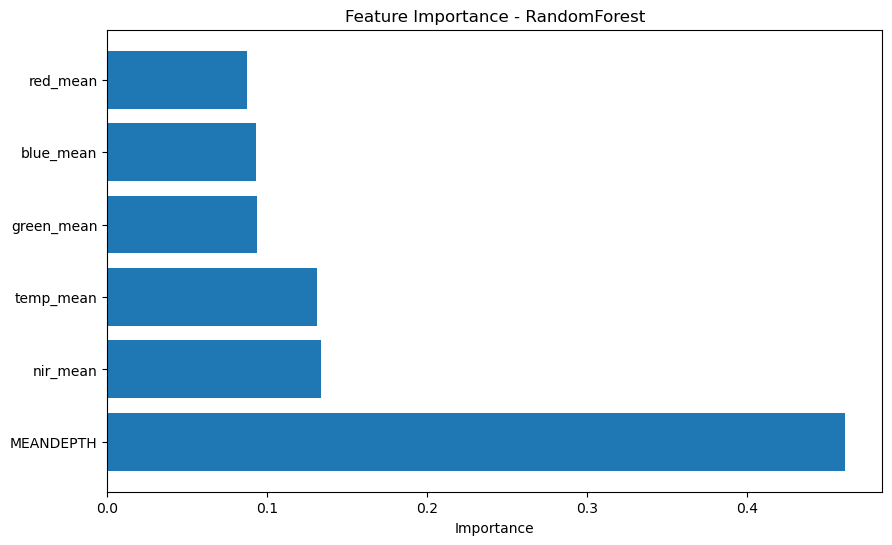

*************Predicted Training data (RandomForest)***************
      blue_mean  green_mean  red_mean  nir_mean  temp_mean  MEANDEPTH  \
418    0.025247    0.047138  0.032969  0.348856  29.426856       14.5   
528    0.202748    0.213398  0.195405  0.422119  19.416920       50.0   
45     0.026324    0.050096  0.034952  0.369445  24.121039       14.5   
83     0.032532    0.051482  0.042832  0.276845  16.015163       16.8   
103    0.025247    0.047138  0.032969  0.348856  29.426856       11.5   
...         ...         ...       ...       ...        ...        ...   
2515   0.029128    0.048303  0.044234  0.248490  11.181723        4.0   
1169   0.053668    0.074320  0.086633  0.184474  15.663244        4.6   
2512   0.028077    0.056553  0.040650  0.355347  19.652809        4.0   
2236   0.040986    0.051485  0.052582  0.127050   6.012725        6.4   
2683   0.118250    0.122662  0.126929  0.176450   9.430898        5.2   

      original_DOC  predicted_DOC  
418            4.0  

*************Predicted Training data (SVR)***************
      blue_mean  green_mean  red_mean  nir_mean  temp_mean  MEANDEPTH  \
418    0.025247    0.047138  0.032969  0.348856  29.426856       14.5   
528    0.202748    0.213398  0.195405  0.422119  19.416920       50.0   
45     0.026324    0.050096  0.034952  0.369445  24.121039       14.5   
83     0.032532    0.051482  0.042832  0.276845  16.015163       16.8   
103    0.025247    0.047138  0.032969  0.348856  29.426856       11.5   
...         ...         ...       ...       ...        ...        ...   
2515   0.029128    0.048303  0.044234  0.248490  11.181723        4.0   
1169   0.053668    0.074320  0.086633  0.184474  15.663244        4.6   
2512   0.028077    0.056553  0.040650  0.355347  19.652809        4.0   
2236   0.040986    0.051485  0.052582  0.127050   6.012725        6.4   
2683   0.118250    0.122662  0.126929  0.176450   9.430898        5.2   

      original_DOC  predicted_DOC  
418            4.0      18.70

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler



df_filtered_lakes['DATE_SMP'] = pd.to_datetime(df_filtered_lakes['DATE_SMP'])
df_filtered_lakes.sort_values('DATE_SMP', inplace=True)



# Preparing the training data 
X = df_filtered_lakes[['blue_mean', 'green_mean', 'red_mean', 'nir_mean', 'temp_mean','MEANDEPTH']]  # Features
#X = df_filtered_lakes[['blue_mean', 'green_mean', 'red_mean', 'nir_mean', 'blue_stdDev', 'green_stdDev','red_stdDev','nir_stdDev','MEANDEPTH']]  # Features

y = df_filtered_lakes['TRUCOLOR']  # Target variable

# Group the data by 'LAKE_LABEL'
grouped_data = df_filtered_lakes.groupby('TRUCOLOR')

min_samples = 15  # Adjust this value based on your dataset and requirements

# Initialize lists to store the training and testing data for all lakes
X_train_all, X_test_all, y_train_all, y_test_all = [], [], [], []

# Loop through each lake group and split data into training and testing sets
for _, lake_group in grouped_data:
    X_lake = lake_group[['blue_mean', 'green_mean', 'red_mean', 'nir_mean', 'temp_mean','MEANDEPTH']]
    y_lake = lake_group['TRUCOLOR']

    if len(lake_group) >= min_samples:
        # Split data into training and testing sets for the current lak
        X_train_lake, X_test_lake, y_train_lake, y_test_lake = train_test_split(X_lake, y_lake, test_size=0.3, random_state=42)

        # Append the data for the current lake to the corresponding lists
        X_train_all.append(X_train_lake)
        X_test_all.append(X_test_lake)
        y_train_all.append(y_train_lake)
        y_test_all.append(y_test_lake)

# Concatenate the training and testing data for all lakes
X_train = pd.concat(X_train_all)
X_test = pd.concat(X_test_all)
y_train = pd.concat(y_train_all)
y_test = pd.concat(y_test_all)

print('**************Data Points Used***************************')
num_rows, num_cols = X.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

# Initialize models
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR(),
    'MLPRegressor': MLPRegressor(random_state=42)
}

# Initialize lists to store model evaluation results
model_names, r2_scores, mses, rmses, maes = [], [], [], [], []

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predict DOC values for the testing data
    y_pred = model.predict(X_test)

    # Create DataFrames for the training and testing data with all bands and the predicted values
    data_train = X_train.copy()
    data_train['original_DOC'] = y_train
    data_train['predicted_DOC'] = model.predict(X_train)

    data_test = X_test.copy()
    data_test['original_DOC'] = y_test
    data_test['predicted_DOC'] = y_pred

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)

    # Append the results to the lists
    model_names.append(model_name)
    r2_scores.append(r2)
    mses.append(mse)
    rmses.append(rmse)
    maes.append(mae)

    # Feature Importance for Random Forest
    if model_name == 'RandomForest':
        feature_importances = model.feature_importances_
        feature_names = X_train.columns
        importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
        importance_df = importance_df.sort_values(by='Importance', ascending=False)

        # Plot feature importance
        plt.figure(figsize=(10, 6))
        plt.barh(importance_df['Feature'], importance_df['Importance'])
        plt.xlabel('Importance')
        plt.title(f'Feature Importance - {model_name}')
        plt.show()

    # Predict DOC values for the testing data
    y_pred = model.predict(X_test)
    
    # Display the predicted DOC values for the training and testing data
    print(f'*************Predicted Training data ({model_name})***************')
    print(data_train)

    print(f'*************Predicted Testing data ({model_name})***************')
    print(data_test)

# Create a dataframe to store the results
evaluation_df_all = pd.DataFrame({
    'Model': model_names,
    'R^2': r2_scores,
    'MSE': mses,
    'RMSE': rmses,
    'MAE': maes
})

# Print the dataframe
print('# WITH LAKE Depth AS FEATURES 2 day window/n')
print(evaluation_df_all)


In [31]:
df_filtered_lakes

,DATE_SMP,reflectance,PONDNAME,TRUCOLOR,MEANDEPTH,DATE,QA_mean,QA_stdDev,blue_mean,blue_stdDev,...,nir_stdDev,red_mean,red_stdDev,swir1_mean,swir1_stdDev,swir2_mean,swir2_stdDev,temp_mean,temp_stdDev,estimate
2924,1984-08-20,NaN,131845552,35.0,7.6,1984-08-21,5441.588065,9.954285,0.035858,0.015617,...,0.093983,0.046264,0.019434,0.175126,0.052561,0.075018,0.028270,17.591752,2.745694,6.077437
3209,1984-08-20,NaN,131845828,5.0,23.2,1984-08-20,5441.588065,9.954285,0.035858,0.015617,...,0.093983,0.046264,0.019434,0.175126,0.052561,0.075018,0.028270,17.591752,2.745694,6.077437
3239,1984-08-20,NaN,131845584,25.0,7.0,1984-08-20,5441.588065,9.954285,0.035858,0.015617,...,0.093983,0.046264,0.019434,0.175126,0.052561,0.075018,0.028270,17.591752,2.745694,6.077437
2911,1984-08-20,NaN,131845683,5.0,21.0,1984-08-21,5441.588065,9.954285,0.035858,0.015617,...,0.093983,0.046264,0.019434,0.175126,0.052561,0.075018,0.028270,17.591752,2.745694,6.077437
3030,1984-08-20,NaN,92083509,80.0,8.0,1984-08-20,5441.588065,9.954285,0.035858,0.015617,...,0.093983,0.046264,0.019434,0.175126,0.052561,0.075018,0.028270,17.591752,2.745694,6.077437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,2011-10-09,NaN,131844719,30.0,10.1,2011-10-11,5444.435964,16.253445,0.033591,0.011020,...,0.080241,0.051290,0.017517,0.156651,0.055403,0.076656,0.032004,21.758904,2.280678,4.165147
85,2011-10-09,NaN,115353807,20.0,16.8,2011-10-10,5443.360008,14.276402,0.036387,0.013545,...,0.071267,0.057365,0.020593,0.160308,0.057349,0.082702,0.037994,21.993284,2.189887,3.673567
264,2011-10-09,NaN,135270604,22.0,1.9,2011-10-09,5443.360008,14.276402,0.036387,0.013545,...,0.071267,0.057365,0.020593,0.160308,0.057349,0.082702,0.037994,21.993284,2.189887,3.673567
763,2011-10-09,NaN,131845836,70.0,10.7,2011-10-11,5444.435964,16.253445,0.033591,0.011020,...,0.080241,0.051290,0.017517,0.156651,0.055403,0.076656,0.032004,21.758904,2.280678,4.165147


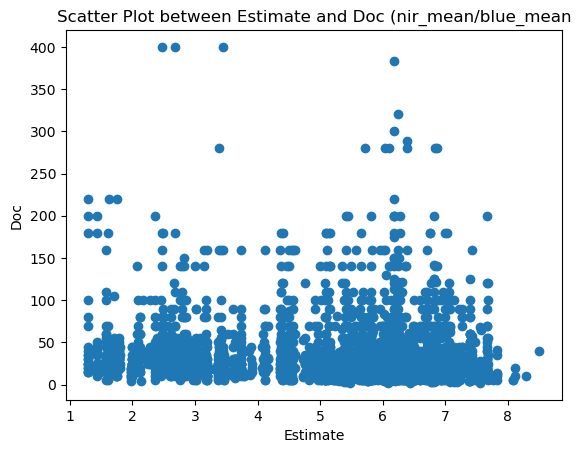

In [33]:
import matplotlib.pyplot as plt

# Assuming 'estimate' and 'doc' are the columns you want to plot
plt.scatter(df_filtered_lakes['estimate'], df_filtered_lakes['TRUCOLOR'])
plt.title('Scatter Plot between Estimate and Doc (nir_mean/blue_mean')
plt.xlabel('Estimate')
plt.ylabel('Doc')
plt.show()


In [56]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

# Increase the number of classes in the target variable to 40
y = pd.cut(df_filtered_lakes['TRUCOLOR'], bins=40, labels=range(1, 41))

# Assuming you have a DataFrame named df_filtered_lakes

# Feature selection (you can customize this based on your actual features)
X = df_filtered_lakes[['blue_mean', 'green_mean', 'red_mean', 'nir_mean', 'temp_mean', 'MEANDEPTH']]

# Data Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Address Class Imbalance using Random Over-Sampling
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train Random Forest with best hyperparameters
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_resampled, y_resampled)

# Evaluate on Test Set
y_pred_rf = best_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Bagging Classifier with Tuned Random Forest as Base Model
bagging_rf = BaggingClassifier(base_estimator=best_rf, n_estimators=1000, random_state=42)
bagging_rf.fit(X_resampled, y_resampled)

# Evaluate Bagging Classifier on Test Set
y_pred_bagging = bagging_rf.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
classification_rep_bagging = classification_report(y_test, y_pred_bagging)

# Output Results
print("Random Forest Results:")
print(f'Accuracy: {accuracy_rf}')
print('Classification Report:')
print(classification_rep_rf)

print("\nBagging Classifier Results:")
print(f'Accuracy: {accuracy_bagging}')
print('Classification Report:')
print(classification_rep_bagging)



ImportError: cannot import name '_check_X' from 'imblearn.utils._validation' (/Users/MAzarderakhsh/anaconda3/lib/python3.11/site-packages/imblearn/utils/_validation.py)

In [57]:
import numpy as np
#--------------------------------------EQUATION---------------------------------------
#Martins et all (2018) landsat 5

# Coefficients
a1 = -0.5986
a2 = 5.5510



# Calculate the B4/B1 ratio and add it as a new column to the DataFrame
df_filtered_lakes['B4_B1_Ratio'] = df_filtered_lakes['nir_mean'] / df_filtered_lakes['blue_mean']

# Apply the equation to estimate CDOM at 485 nm
df_filtered_lakes['aCDOM_485'] = a1 + a2 * (df_filtered_lakes['B4_B1_Ratio'])

#--------------------------------------PLOT---------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

df_filtered_lakes = df_filtered_lakes.dropna(subset=['TRUCOLOR', 'aCDOM_485'])

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X = df_filtered_lakes['TRUCOLOR'].values.reshape(-1, 1)
y = df_filtered_lakes['aCDOM_485'].values

# Create a linear regression model
regression_model = LinearRegression()
regression_model.fit(X, y)

# Predict y values using the model
y_pred = regression_model.predict(X)

# Calculate R^2
r2 = r2_score(y, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Print R^2 and RMSE
print("R^2:", r2)
print("RMSE:", rmse)

# Plot measured DOC_MG_L against aCDOM
plt.scatter(df_filtered_lakes['DOC'], df_filtered_lakes['aCDOM_485'])
plt.plot(X, y_pred, color='red', linewidth=2)
plt.xlabel('Measured DOC_MG_L')
plt.ylabel('CDOM')
plt.title('CDOM  vs.  Measured DOC')
plt.legend()
plt.ylim(0,100)
plt.show()


R^2: 0.0016554630392872083
RMSE: 19.614200623702615


KeyError: 'DOC'

# Work here
l5-sr-adk-hist.csv use this df


Results for Lake 89364195:
Number of points: 12
R^2: 0.5948209445655548
RMSE: 9.086925603640825

Results for Lake 89366239:
Number of points: 7
R^2: 0.6394263347286927
RMSE: 8.535281995229411


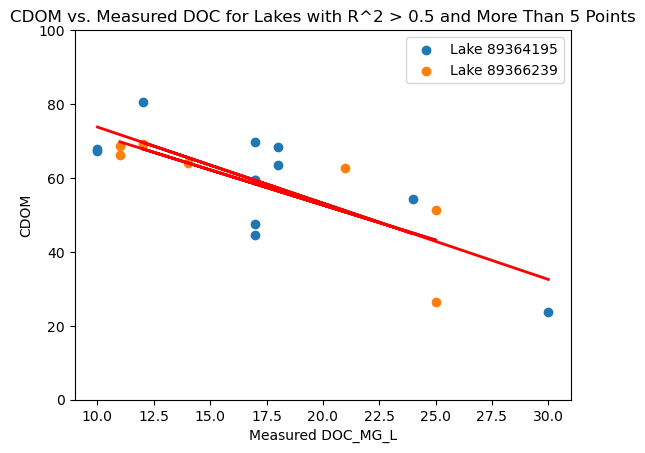

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Your coefficients
a1 = -0.5986
a2 = 5.5510

# Assuming df_filtered_lakes is your DataFrame with columns 'pond', 'nir_mean', 'blue_mean', and 'TRUCOLOR'
# Loop through each unique lake ('pond')
for lake in df_filtered_lakes['PONDNAME'].unique():
    # Filter the DataFrame for the current lake
    lake_data = df_filtered_lakes[df_filtered_lakes['PONDNAME'] == lake]

    # Calculate the B4/B1 ratio and add it  a new column
    lake_data['BRatio'] = lake_data['blue_mean'] / lake_data['nir_mean']

    # Apply the equation to estimate CDOM at 485 nm
   # lake_data['aCDOM_485'] = a1 + a2 * lake_data['B4_B1_Ratio']
    lake_data['aCDOM_485']=lake_data['BRatio']

    # Drop NaN values in the relevant columns
    lake_data = lake_data.dropna(subset=['TRUCOLOR', 'aCDOM_485'])

    # Only proceed if the lake has more than 5 points
    if len(lake_data) > 5:
        # Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
        X = lake_data['TRUCOLOR'].values.reshape(-1, 1)
        y = lake_data['aCDOM_485'].values

        # Create a linear regression model
        regression_model = LinearRegression()
        regression_model.fit(X, y)

        # Predict y values using the model
        y_pred = regression_model.predict(X)

        # Calculate R^2
        r2 = r2_score(y, y_pred)

        # Only print results for lakes with R^2 greater than 0.5
        if r2 > 0.5:
            # Calculate RMSE
            rmse = np.sqrt(mean_squared_error(y, y_pred))

            # Print results for each lake
            print(f"\nResults for Lake {lake}:")
            print("Number of points:", len(lake_data))
            print("R^2:", r2)
            print("RMSE:", rmse)

            # Plot measured DOC_MG_L against aCDOM for each lake
            plt.scatter(lake_data['TRUCOLOR'], lake_data['aCDOM_485'], label=f'Lake {lake}')
            plt.plot(X, y_pred, color='red', linewidth=2)

# Plot settings
plt.xlabel('Measured DOC_MG_L')
plt.ylabel('CDOM')
plt.title('CDOM vs. Measured DOC for Lakes with R^2 > 0.5 and More Than 5 Points')
plt.legend()
plt.ylim(0, 100)
plt.show()


In [ ]:
df_filtered_lakes.drop('reflectance', axis=1)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X_column_name = 'DOC'  # Replace with the actual column name for Measured DOC_MG_L
y_column_name = 'aCDOM_485'  # Replace with the actual column name for aCDOM_485

# Create a list of lakes
lakes = ["CLEMENTS POND", "ROUND POND"]

# Calculate the number of subplots needed based on the number of lakes
num_lakes = len(lakes)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_lakes - 1) // num_cols + 1  # Calculate the number of rows

# Create subplots for all lakes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)
axes = axes.ravel()

for i, lake in enumerate(lakes):
    # Filter the data for the current lake
    lake_data = df_filtered_lakes[df_filtered_lakes['PONDNAME'] == lake]

    # Check if there's enough data for regression (at least 2 data points)
    if len(lake_data) >= 1:
        X = lake_data[X_column_name].values.reshape(-1, 1)
        y = lake_data[y_column_name].values

        # Create a linear regression model
        regression_model = LinearRegression()
        regression_model.fit(X, y)

        # Predict y values using the model
        y_pred = regression_model.predict(X)

        # Calculate R^2
        r2 = r2_score(y, y_pred)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Plot measured DOC_MG_L against aCDOM for the current lake
        axes[i].scatter(X, y)
        axes[i].plot(X, y_pred, color='red', linewidth=2)
        axes[i].set_xlabel('Measured DOC')
        axes[i].set_ylabel('CDOM')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}')
        axes[i].legend()
    else:
        # If not enough data points, indicate it in the title
        axes[i].set_title(f'{lake}: Not enough data for regression')

# Hide any remaining empty subplots
for i in range(len(lakes), num_cols * num_rows):
    fig.delaxes(axes[i])

# Show the plots
plt.tight_layout()
plt.show()


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import itertools

# Your coefficients
a1 = -0.5986
a2 = 5.5510

# Olmanson (Landsat 8) band ratios
df_filtered_lakes['Rrs_ratio1'] = df_filtered_lakes['red_mean'] / df_filtered_lakes['green_mean']
df_filtered_lakes['Rrs_ratio2'] = df_filtered_lakes['nir_mean'] / df_filtered_lakes['green_mean']

# Create empty lists to store results
pond_list = []
num_points_list = []
r2_list = []
rmse_list = []
trucolor_list = []
bratio_list = []
formula_list = []

# Loop through each unique lake ('PONDNAME')
for lake in df_filtered_lakes['PONDNAME'].unique():
    # Filter the DataFrame for the current lake
    lake_data = df_filtered_lakes[df_filtered_lakes['PONDNAME'] == lake]

    # Generate all possible combinations of two bands
    bands = ['blue_mean', 'green_mean', 'red_mean', 'nir_mean', 'swir1_mean', 'swir2_mean', 'blue_stdDev', 'green_stdDev', 'red_stdDev', 'nir_stdDev', 'swir1_stdDev', 'swir2_stdDev']
    band_combinations = list(itertools.combinations(bands, 2))

    # Loop through each band combination
    for band1, band2 in band_combinations:
        # Create a new column with the band ratio in the column name
        formula = f'{band1}/{band2}'
        column_name = f'BRatio_{formula}'  # Remove '/' from the formula

        # Apply the Olmanson formula to estimate CDOM at 485 nm
        lake_data['aCDOM_485'] = a1 + a2 * lake_data['Rrs_ratio1'] + a2 * lake_data['Rrs_ratio2']

        # Drop NaN values in the relevant columns
        lake_data_filtered = lake_data.dropna(subset=['TRUCOLOR', 'aCDOM_485'])

        # Only proceed if the lake has more than 5 points
        if len(lake_data_filtered) > 5:
            # Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
            X = lake_data_filtered['TRUCOLOR'].values.reshape(-1, 1)
            y = lake_data_filtered['aCDOM_485'].values

            # Create a linear regression model
            regression_model = LinearRegression()
            regression_model.fit(X, y)

            # Predict y values using the model
            y_pred = regression_model.predict(X)

            # Calculate R^2
            r2 = r2_score(y, y_pred)

            # Only store results for lakes with R^2 greater than 0.5
            if r2 > 0.5:
                # Calculate RMSE
                rmse = np.sqrt(mean_squared_error(y, y_pred))

                # Store results in lists
                pond_list.append(lake)
                num_points_list.append(len(lake_data_filtered))
                r2_list.append(r2)
                rmse_list.append(rmse)
                trucolor_list.append(lake_data_filtered['TRUCOLOR'].mean())
                bratio_list.append(lake_data_filtered[column_name].mean())
                formula_list.append(formula)

                # Plot measured DOC_MG_L against aCDOM for each lake
                plt.scatter(lake_data_filtered['TRUCOLOR'], lake_data_filtered['aCDOM_485'], label=f'Lake {lake} - {formula}')
                plt.plot(X, y_pred, linewidth=2)

# Plot settings
plt.xlabel('Measured DOC_MG_L')
plt.ylabel('CDOM')
plt.title('CDOM vs. Measured DOC for Lakes with R^2 > 0.5 and More Than 5 Points')
plt.legend()
plt.ylim(-2, 7)
plt.show()

# Create a DataFrame from the lists
result_df = pd.DataFrame({
    'PONDNAME': pond_list,
    'Number_of_Points': num_points_list,
    'R^2': r2_list,
    'RMSE': rmse_list,
    'TRUCOLOR': trucolor_list,
    'Formula': formula_list,
    'BRatio_Mean': bratio_list  # You can modify this column name as needed
})

# Display the result DataFrame
result_df


NameError: name 'df_filtered_lakes' is not defined

In [ ]:
df_filtered_lakes

In [ ]:
import numpy as np


#Koll-eyed et all (landsat 8) 2021

# Coefficients
a1 = 3.65
a2 = 2.91
a3 = 0.41


# Calculate ln(CDOM(a440))
df_filtered_lakes['ln_CDOM_a440'] = a1 - a2 * np.log(df_filtered_lakes['green_mean'] / df_filtered_lakes['red_mean']) - a3 * np.log(df_filtered_lakes['blue_mean'])

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X = df_filtered_lakes['DOC'].values.reshape(-1, 1)
y = df_filtered_lakes['ln_CDOM_a440'].values

# Create a linear regression model
regression_model = LinearRegression()
regression_model.fit(X, y)

# Predict y values using the model
y_pred = regression_model.predict(X)

# Calculate R^2
r2 = r2_score(y, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Print R^2 and RMSE
print("R^2:", r2)
print("RMSE:", rmse)

# Plot measured DOC_MG_L against aCDOM
plt.scatter(df_filtered_lakes['DOC'], df_filtered_lakes['ln_a440'],  label='Measured DOC')
# plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel('Measured DOC')
plt.ylabel('CDOM')
plt.title('Linear Regression: CDOM  vs.  Measured DOC')
plt.legend()
plt.ylim(5,30)
plt.show()


In [ ]:
# Olmanson et al. (2016)
# LC5_BANDS = ['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B7', 'ST_B6', 'QA_PIXEL']
# LC8_BANDS = ['SR_B2','SR_B3','SR_B4',  'SR_B5','SR_B6','SR_B7','ST_B10','QA_PIXEL']; #Landsat 8
# STD_NAMES = ['blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'temp', 'QA']


a1=14.62
a2= 2.77 
a3= -14.21
df_filtered_lakes['ln(a440)_equation4'] = a1 + a2 * (df_filtered_lakes['blue_mean'] / df_filtered_lakes['nir_mean']) + a3 * (df_filtered_lakes['green_mean'] / df_filtered_lakes['nir_mean'])


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X = df_filtered_lakes['DOC'].values.reshape(-1, 1)
y = df_filtered_lakes['ln(a440)_equation4'].values

# Create a linear regression model
regression_model = LinearRegression()
regression_model.fit(X, y)

# Predict y values using the model
y_pred = regression_model.predict(X)

# Calculate R^2
r2 = r2_score(y, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Print R^2 and RMSE
print("R^2:", r2)
print("RMSE:", rmse)

# Plot measured DOC_MG_L against aCDOM
plt.scatter(df_filtered_lakes['DOC'], df_filtered_lakes['ln_a440'],  label='Measured DOC_MG_L')
# plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel('Measured DOC_MG_L')
plt.ylabel('CDOM')
plt.title('Linear Regression: CDOM  vs.  Measured DOC_MG_L ')
plt.legend()
plt.ylim(10,30)
plt.show()


In [ ]:
#Brezonik et al. (2005)
a1= 2.304
a2= -255.88 
a3= -0.2542

# LC5_BANDS = ['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B7', 'ST_B6', 'QA_PIXEL']
# LC8_BANDS = ['SR_B2','SR_B3','SR_B4',  'SR_B5','SR_B6','SR_B7','ST_B10','QA_PIXEL']; #Landsat 8
# STD_NAMES = ['blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'temp', 'QA']

df_filtered_lakes['ln(a440)_equation5'] = a1 + a2 * df_filtered_lakes['green_mean'] + a3 * (df_filtered_lakes['green_mean'] / df_filtered_lakes['swir1_mean'])

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X = df_filtered_lakes['DOC'].values.reshape(-1, 1)
y = df_filtered_lakes['ln(a440)_equation5'].values

# Create a linear regression model
regression_model = LinearRegression()
regression_model.fit(X, y)

# Predict y values using the model
y_pred = regression_model.predict(X)

# Calculate R^2
r2 = r2_score(y, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Print R^2 and RMSE
print("R^2:", r2)
print("RMSE:", rmse)

# Plot measured DOC_MG_L against aCDOM
plt.scatter(df_filtered_lakes['DOC'], df_filtered_lakes['ln_a440'],  label='Measured DOC_MG_L')
# plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel('Measured DOC')
plt.ylabel('CDOM')
plt.title('Linear Regression: CDOM  vs.  Measured DOC')
plt.legend()
plt.ylim(5,30)
plt.show()
